In [55]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
(df.isnull().sum()/len(df))*100

'''
Now,when we use dropna()? if missingvalue < 3% use dropna()

if missingvalue range between 4-40% use fillna()

if missingvalue range >50% simply drop the col

Now, how toget this % ?
'''

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [59]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
#sns.pairplot(df)

<AxesSubplot:>

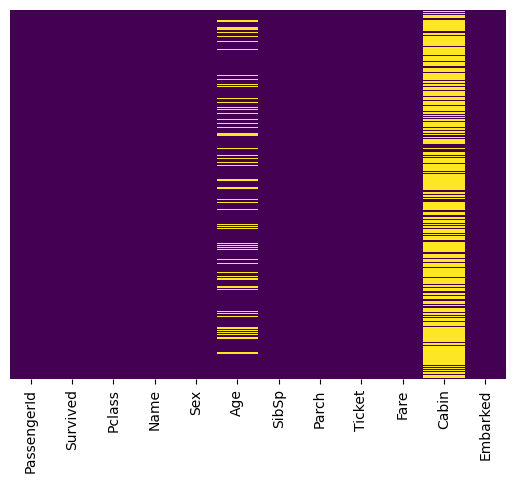

In [61]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [62]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

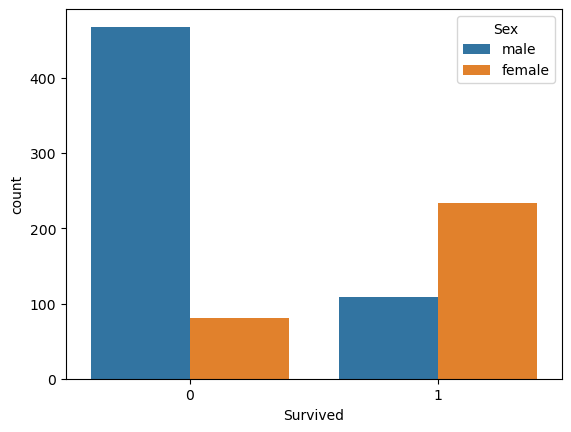

In [63]:
sns.countplot(data=df, x="Survived", hue="Sex")

<AxesSubplot:xlabel='Survived', ylabel='count'>

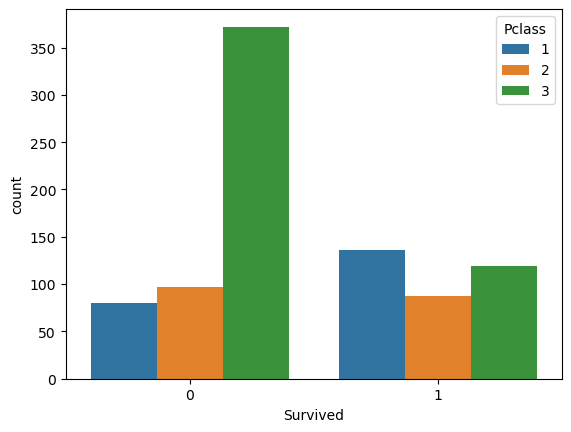

In [64]:
sns.countplot(data=df, x="Survived", hue="Pclass")

<AxesSubplot:xlabel='SibSp', ylabel='count'>

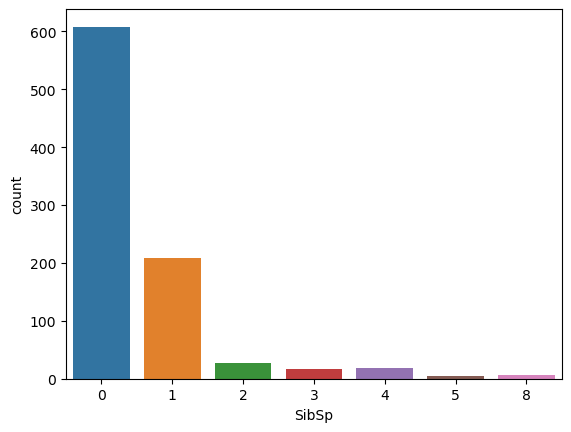

In [65]:
sns.countplot(data=df, x="SibSp")

<AxesSubplot:xlabel='Parch', ylabel='count'>

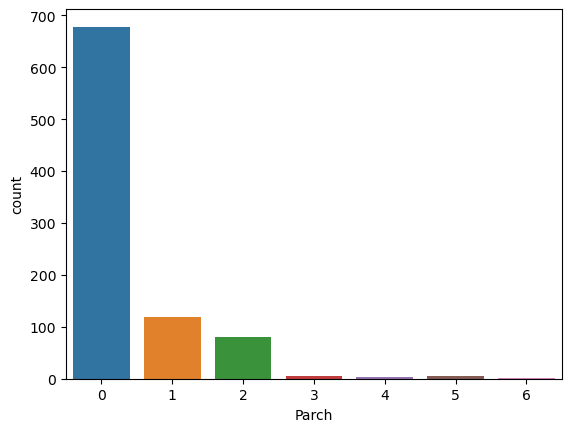

In [66]:
sns.countplot(data=df, x="Parch")

<AxesSubplot:xlabel='Age', ylabel='Density'>

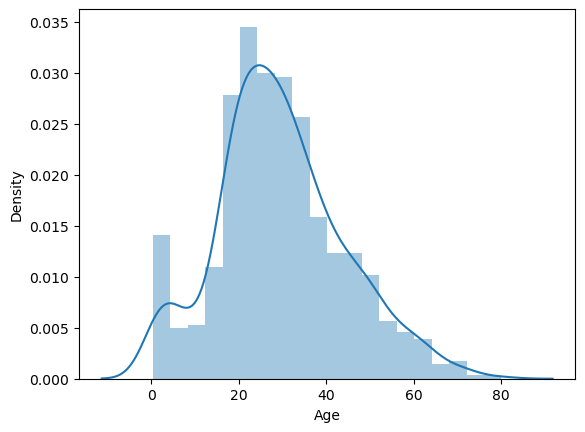

In [67]:
sns.distplot(df["Age"])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

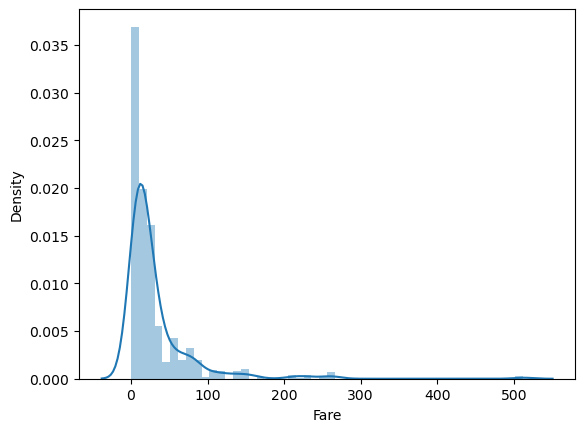

In [68]:
sns.distplot(df["Fare"])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

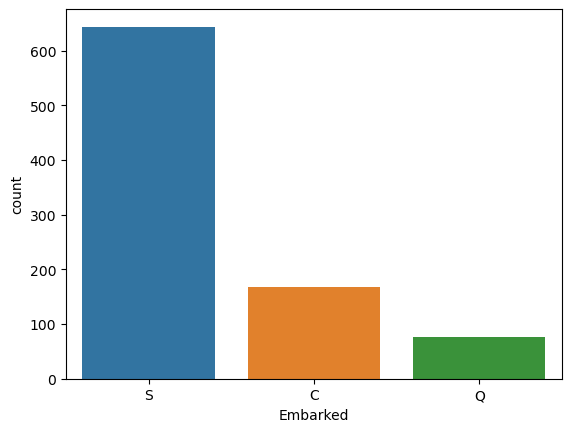

In [69]:
sns.countplot(data=df, x="Embarked")

In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


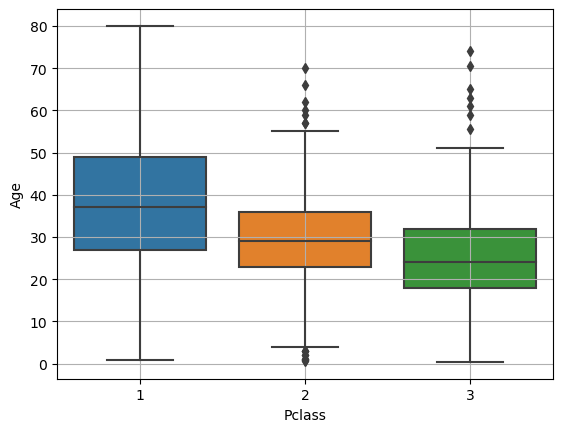

In [71]:
sns.boxplot(data=df, x="Pclass", y="Age")
plt.grid()

In [72]:
def fillage(cols):
    pclass =cols[0]
    age = cols[1]
    
    if(pd.isnull(age)):
        if(pclass==1):
            return 38
        elif(pclass==2):
            return 29
        else:
            return 24
    else:
        return age
    

In [73]:
df["Age"] =df[["Pclass", "Age"]].apply(fillage, axis=1)

<AxesSubplot:>

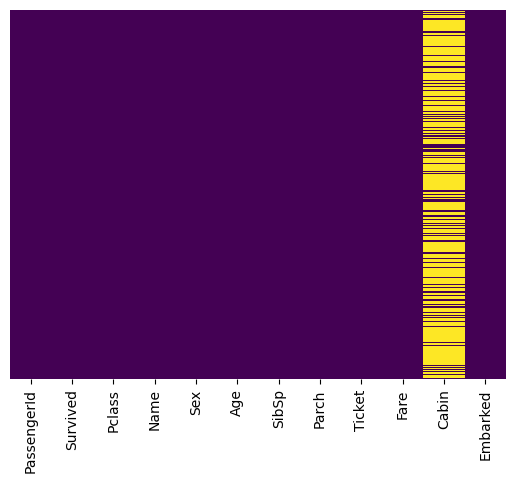

In [74]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [75]:
df.drop("Cabin", axis=1, inplace=True)

<AxesSubplot:>

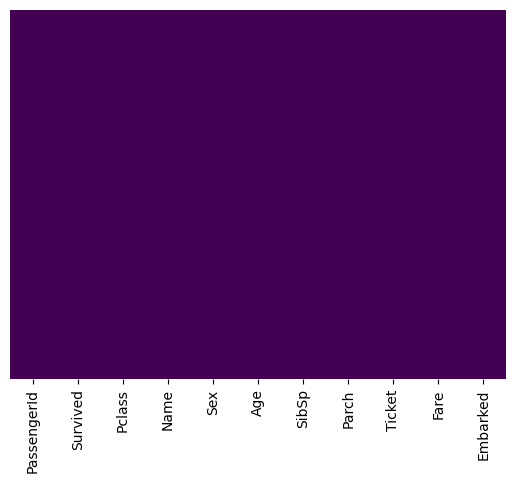

In [76]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [78]:
df.dropna(inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [80]:
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [81]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [82]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [83]:
# This is another way for handling categorical data.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
# ColumnTransformer takes parameter transformers,which takes list. 
# inside thislist,instructions are given in the form of tuple.
# We are encoding the cols,"encode",by OrdinalEncoder() on 2 cols ["Sex", "Embarked"]
ct = ColumnTransformer(
    transformers=[
        (
            "encode",
            OrdinalEncoder(),
            ["Sex", "Embarked"]
            
        )
    ],
    remainder="passthrough" # another variable- donot do any operation onother cols,passthrough
)

x = ct.fit_transform(x)

In [84]:
x

array([[ 1.    ,  2.    ,  3.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 0.    ,  2.    ,  3.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  2.    ,  3.    , ...,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  0.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 1.    ,  1.    ,  3.    , ...,  0.    ,  0.    ,  7.75  ]])

In [85]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, 
                                                random_state=1)

# KNeighborsClassifier

In [86]:
#Creating KNN model.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [87]:
train = knn.score(xtrain, ytrain)
test = knn.score(xtest, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}")

Training Accuracy : 0.7813504823151125
Testing Accuracy : 0.6891385767790262


In [88]:
# training accuracy is high means low bias and testing accuracy low means high variance.
#Low Bias + High Variance => Overfitting

In [89]:
#hyperparameter tuning
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    
    train = knn.score(xtrain, ytrain)
    test = knn.score(xtest, ytest)
    
    print(f"{i}  {train}  {test}")
    

1  0.9839228295819936  0.700374531835206
2  0.8231511254019293  0.6704119850187266
3  0.842443729903537  0.6928838951310862
4  0.7877813504823151  0.6704119850187266
5  0.7813504823151125  0.6891385767790262
6  0.7636655948553055  0.6629213483146067
7  0.7636655948553055  0.6741573033707865
8  0.7540192926045016  0.6816479400749064
9  0.7588424437299035  0.6666666666666666
10  0.7459807073954984  0.6704119850187266
11  0.7443729903536977  0.6966292134831461
12  0.7459807073954984  0.704119850187266
13  0.7556270096463023  0.6966292134831461
14  0.752411575562701  0.6966292134831461
15  0.7491961414790996  0.700374531835206
16  0.747588424437299  0.6966292134831461
17  0.7556270096463023  0.7078651685393258
18  0.7556270096463023  0.700374531835206
19  0.7491961414790996  0.6891385767790262
20  0.7411575562700965  0.6928838951310862
21  0.7395498392282959  0.6853932584269663
22  0.7282958199356914  0.6816479400749064
23  0.7154340836012861  0.6741573033707865
24  0.7266881028938906  0.6

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))
# not a very great report.Accuracy 70%, recall score for value 1is 55%

              precision    recall  f1-score   support

           0       0.74      0.82      0.77       166
           1       0.63      0.51      0.57       101

    accuracy                           0.70       267
   macro avg       0.68      0.67      0.67       267
weighted avg       0.70      0.70      0.70       267



# LogisticRegression

In [91]:
# So now, trying with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [92]:
train = logreg.score(xtrain, ytrain)
test = logreg.score(xtest, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}")

Training Accuracy : 0.7909967845659164
Testing Accuracy : 0.8426966292134831


In [93]:
#High Bias + Low Variance => Underfitting

In [94]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [95]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, 
                                                random_state=1, stratify=y)

In [96]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [97]:
train = logreg.score(xtrain, ytrain)
test = logreg.score(xtest, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}")

Training Accuracy : 0.8038585209003215
Testing Accuracy : 0.8052434456928839


In [98]:
ypred = logreg.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       165
           1       0.76      0.73      0.74       102

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



# Support Vectors Machine

In [99]:
# now we expect svm to give even more accuray,because svm gives error margin.
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrain, ytrain)

SVC()

In [100]:
train = svm.score(xtrain, ytrain)
test = svm.score(xtest, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}")
# svm deal with higher dimension, and map lower dim data to higher dim, so we need to standerdize our data.
# i.e. bring all data points in 1 scale.i.e.u need to perform scaling so that we can plot exact point in higher 
# dimension.


Training Accuracy : 0.6752411575562701
Testing Accuracy : 0.6928838951310862


In [101]:
# therefore, scaling our data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrains = sc.fit_transform(xtrain)
xtests = sc.transform(xtest)

In [102]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrains, ytrain)

SVC()

In [103]:
train = svm.score(xtrains, ytrain)
test = svm.score(xtests, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}")

Training Accuracy : 0.8344051446945338
Testing Accuracy : 0.8389513108614233


In [104]:
ypred = svm.predict(xtests)
print(classification_report(ytest, ypred))
# gives 84% accuracy.

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       165
           1       0.85      0.71      0.77       102

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.84       267



In [105]:
svm.support_ #support vectors index values

array([  3,   6,  13,  14,  26,  28,  32,  33,  36,  39,  40,  42,  44,
        47,  48,  49,  56,  61,  69,  73,  76,  79,  84,  88,  92,  93,
        94, 101, 102, 104, 106, 108, 110, 111, 112, 120, 121, 122, 123,
       124, 131, 136, 144, 152, 166, 172, 181, 183, 192, 196, 199, 203,
       208, 213, 216, 217, 219, 224, 225, 230, 233, 235, 237, 241, 247,
       250, 256, 260, 268, 276, 278, 279, 284, 296, 300, 320, 321, 333,
       334, 336, 338, 339, 341, 345, 346, 351, 358, 365, 368, 370, 384,
       386, 387, 392, 398, 399, 408, 412, 418, 419, 420, 424, 431, 432,
       433, 434, 437, 440, 445, 447, 451, 453, 455, 456, 458, 461, 466,
       469, 473, 478, 484, 495, 496, 502, 504, 505, 510, 521, 525, 528,
       529, 530, 535, 536, 539, 551, 553, 555, 557, 558, 560, 566, 570,
       572, 574, 590, 593, 594, 596, 599, 602, 604, 607, 608, 609,   5,
         9,  16,  19,  23,  30,  31,  45,  52,  54,  57,  59,  62,  70,
        71,  81,  82,  85,  91,  95,  96,  97,  98, 109, 113, 11

In [106]:
svm.support_vectors_
# svm.support_ ---- this gives indexno.of all the support vectors

array([[ 0.73977272,  0.57295786,  0.81665558, ..., -0.49599301,
        -0.50029552,  0.59732303],
       [ 0.73977272, -1.97261207,  0.81665558, ...,  0.37060152,
        -0.50029552, -0.39890582],
       [ 0.73977272,  0.57295786, -1.58504546, ..., -0.49599301,
        -0.50029552, -0.12709072],
       ...,
       [ 0.73977272,  0.57295786, -0.38419494, ...,  0.37060152,
         0.73456088, -0.29711141],
       [-1.35176652,  0.57295786, -1.58504546, ...,  1.23719605,
        -0.50029552,  0.47844835],
       [ 0.73977272,  0.57295786, -0.38419494, ...,  0.37060152,
        -0.50029552, -0.1253135 ]])

In [107]:
svm.intercept_  #intercept of hyperplane.

array([-0.19467527])

In [108]:
from sklearn.svm import SVC #classification
from sklearn.svm import SVR #regression